<a href="https://colab.research.google.com/github/pasquale90/mthesis/blob/master/DCase13_DataAnalysis_and_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
https://www.kaggle.com/cttm4a1/fork-of-esc50-visualization
https://www.kaggle.com/ekami66/detailed-exploratory-data-analysis-with-python
https://levelup.gitconnected.com/audio-data-analysis-using-deep-learning-part-1-7f6e08803f60

Στο DCase13_DataAnalysis_and_visualizations.ipynb πραγματοποιείται μια προεπεξεργαστική ανάλυση δεδομένων του dataset 2013_Dcase_acoustic_scene_classification βάσει των αποτελεσμάτων της οποίας ενδέχεται είτε να προβούμε σε ομοιόμορφο διαμερισμό του περιεχομένου σε k-φακέλους(k-fold), είτε σε ενέργειες επέκτασης περιεχομένου (data augmentation) είτε στην εξαγωγή συμπερασμάτων και προβλέψεων βάσει αυτών.

In [0]:
#Import Google_drive
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
#Import the vital libraries 

import os
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import wavfile
import librosa
import seaborn as sns
import scipy as sp

data_path='/content/gdrive/My Drive/dissertation/scenes_stereo[dcase2013]/'
audio_path='/content/gdrive/My Drive/dissertation/scenes_stereo[dcase2013]/scenes_stereo/'

There is no csv file included. Data related to classes,folds and duration will be extracted manually..

*Instead of running this code below there's a way to skip these steps and go to the [SkillPoint](https://colab.research.google.com/drive/1mZ1wdDWMIzMAzvK284pG3YP_6IJgbFZS#scrollTo=WMC4ZoZBnDCa&line=1&uniqifier=1) directly

In [3]:
#Store Files
audiofiles = os.listdir(audio_path)
print(len(audiofiles))

100


In [4]:
classes =  list (['bus', 'busystreet', 'office', 'openairmarket', 'park', 
                  'quietstreet', 'restaurant', 'supermarket', 'tube', 'tubestation'])
print(classes)

['bus', 'busystreet', 'office', 'openairmarket', 'park', 'quietstreet', 'restaurant', 'supermarket', 'tube', 'tubestation']


In [5]:
dc13=pd.DataFrame(data=audiofiles,columns=['filename'])
print(dc13.shape)
print(dc13.info())

(100, 1)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  100 non-null    object
dtypes: object(1)
memory usage: 928.0+ bytes
None


In [6]:
#Set the "filename" column as the index indicator 
dc13.set_index('filename',inplace=True)
print(dc13.shape)
print(dc13.info())

(100, 0)
<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, bus01.wav to tubestation10.wav
Empty DataFrameNone


In [8]:
#create a new columns for data dist -> our goal to depict avg audio length per class
#We create the columns 'Class', class_id, fold and finally length
#Class:the class of the file
#class_id: the set of a numeric value related to the class
#fold:10 fold separation
#length: the length of each file is equal, also known to be 30seconds, however we run the code
#{Have already run}
#'''
count=0
for f in tqdm(audiofiles):
  #print(f)

  name = f.split('.')[0]#get the name without the acronym wav

  dc13.at[f, 'Class']=name[:(-2)]#eg. file:restaurant01 belongs to class restaurant
  dc13.at[f, 'class_id'] = classes.index(name[:(-2)])#set a numeric value to class

  dc13.at[f, 'fold']=int(name[(-2):])#eg. file:restaurant01 belongs to fold 01=fold1

  #length
  rate, signal = wavfile.read(audio_path+f)
  dc13.at[f, 'length']=signal.shape[0]/rate
  
  '''
  if(count<5):
    print(dc13.loc[f])
    print('\n\n')
    count+=1
  '''
  
dc13.reset_index(inplace=True)

dc13.to_csv('../content/gdrive/My Drive/dissertation/scenes_stereo[dcase2013]/dc13.csv',header=True,index=False)
dc13.set_index('filename',inplace=True)

#class dist basic statistics based on the length 
print(dc13['length'].describe())
#'''

100%|██████████| 100/100 [00:00<00:00, 117.06it/s]

count    100.0
mean      30.0
std        0.0
min       30.0
25%       30.0
50%       30.0
75%       30.0
max       30.0
Name: length, dtype: float64


SkillPoint 
                     - get the '.csv' and the 'stored_audiofile_names' directly

In [9]:
#Un-comment to run skillpoint_code
#'''
audiofiles = os.listdir(audio_path)
dc13 = pd.read_csv(data_path+'dc13.csv')
dc13.set_index('filename',inplace=True)

classes =  list (['bus', 'busystreet', 'office', 'openairmarket', 'park', 
                  'quietstreet', 'restaurant', 'supermarket', 'tube', 'tubestation'])
#'''
#checkprint
print(len(audiofiles))
print(dc13.shape)

100
(100, 4)


In [10]:
#printing info about the dataset
print(dc13.info())

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, bus01.wav to tubestation10.wav
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Class     100 non-null    object 
 1   class_id  100 non-null    float64
 2   fold      100 non-null    float64
 3   length    100 non-null    float64
dtypes: float64(3), object(1)
memory usage: 3.9+ KB
None


In [0]:
#Print the data types
print(list(set(dc13.dtypes.tolist())))

[dtype('float64'), dtype('O')]


In [11]:
#class dist basic statistics based on the length 
print(dc13['length'].describe())

count    100.0
mean      30.0
std        0.0
min       30.0
25%       30.0
50%       30.0
75%       30.0
max       30.0
Name: length, dtype: float64


In [12]:
#Create a class_dist based on mean_length of each class so as to plot a graphical representation
class_dist = dc13.groupby(['Class'])['length'].mean()
print('\tClass length distribution\n',class_dist)
#Calculate deviation for each class
print('\n\tClass length deviation\n',dc13.groupby(['Class'])['length'].std())
print("\n")

print('\tFile\'s Class distribution\n',dc13.groupby(['Class'])['Class'].count())

	Class length distribution
 Class
bus              30.0
busystreet       30.0
office           30.0
openairmarket    30.0
park             30.0
quietstreet      30.0
restaurant       30.0
supermarket      30.0
tube             30.0
tubestation      30.0
Name: length, dtype: float64

	Class length deviation
 Class
bus              0.0
busystreet       0.0
office           0.0
openairmarket    0.0
park             0.0
quietstreet      0.0
restaurant       0.0
supermarket      0.0
tube             0.0
tubestation      0.0
Name: length, dtype: float64


	File's Class distribution
 Class
bus              10
busystreet       10
office           10
openairmarket    10
park             10
quietstreet      10
restaurant       10
supermarket      10
tube             10
tubestation      10
Name: Class, dtype: int64


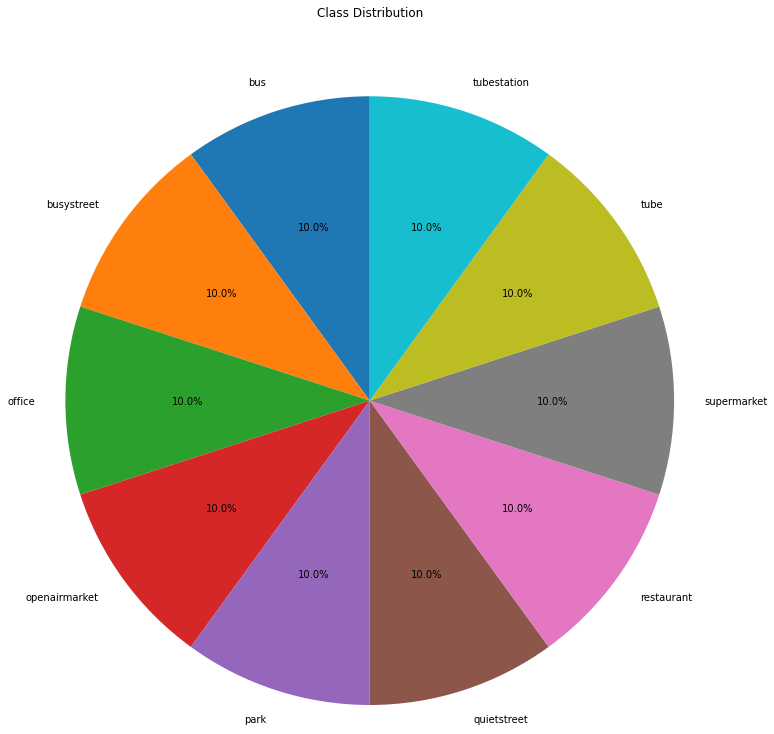

In [13]:
# Plot Class_dist
fig ,ax = plt.subplots(figsize=(12,12))
ax.set_title('Class Distribution', y=1.08)
ax.pie(class_dist, labels=class_dist.index, autopct='%1.1f%%', shadow=False, startangle=90 ,radius=37)
ax.axis('equal')#circle
plt.show()
#https://stackoverflow.com/questions/49199164/increasing-pie-chart-size-with-matplotlib-radius-parameter-appears-to-do-nothin

In [14]:
dc13.reset_index(inplace=True)
print(dc13.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   filename  100 non-null    object 
 1   Class     100 non-null    object 
 2   class_id  100 non-null    float64
 3   fold      100 non-null    float64
 4   length    100 non-null    float64
dtypes: float64(3), object(2)
memory usage: 4.0+ KB
None


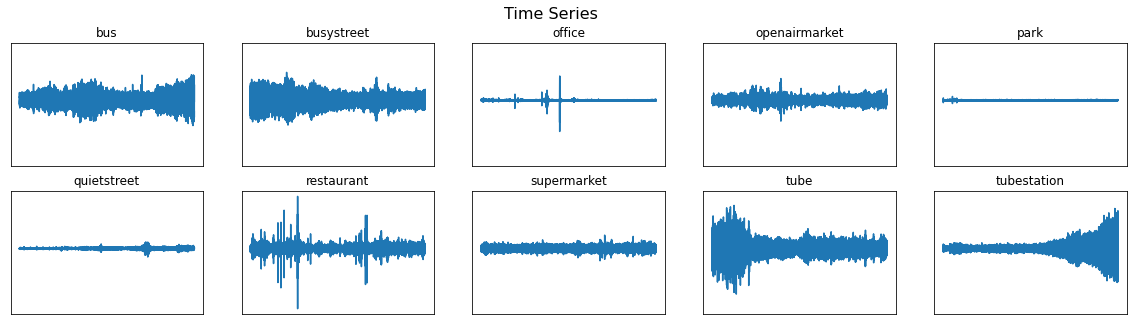

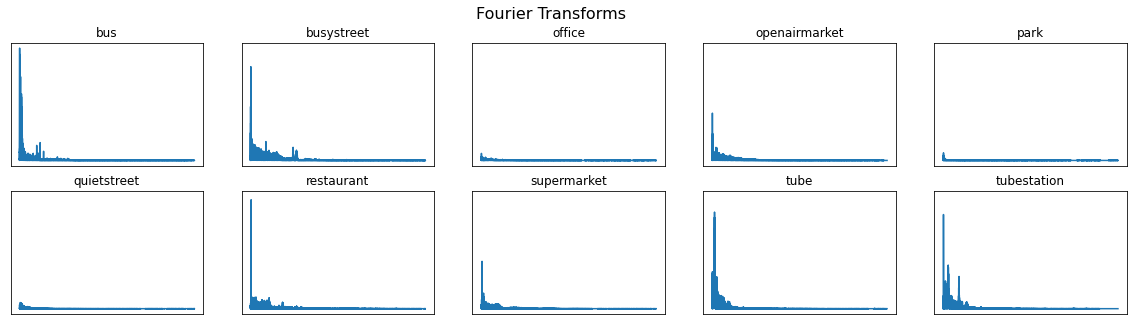

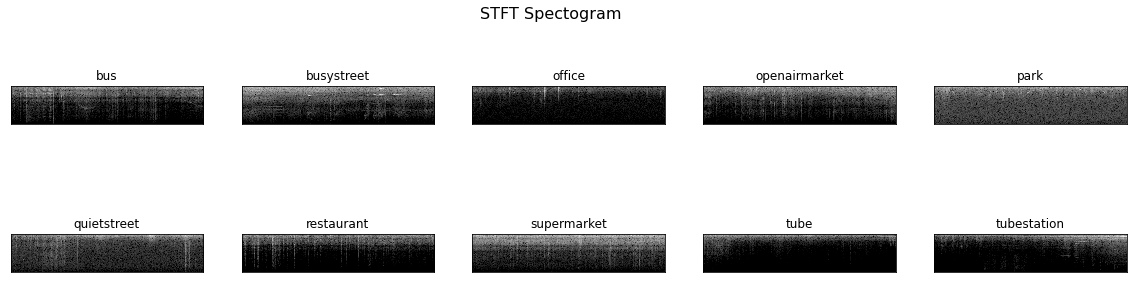

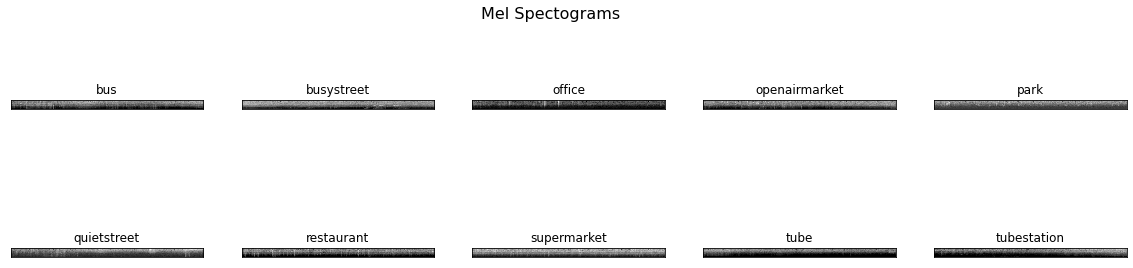

In [16]:
#PLOTS {Waveform, Spectrum, STFT-linear spectogram, log-Mel Spectogram}
#plot only the first file's info, for each of the 10 different classes

#***************FIX WINDOW-OVERLAP AND NFFT SIZES

'''
***find an optimal window: http://support.ircam.fr/docs/AudioSculpt/3.0/co/Window%20Size.html ***
'''

def plot_signals(signals):
  fig, axes = plt.subplots(nrows=2,ncols=5,sharex=False,sharey=True,figsize=(20,5))
  fig.suptitle('Time Series', size=16)
  i=0
  for x in range(2):
    for y in range(5):
      axes[x,y].set_title(list(signals.keys())[i])
      axes[x,y].plot(list(signals.values())[i])
      axes[x,y].get_xaxis().set_visible(False)
      axes[x,y].get_yaxis().set_visible(False)
      i +=1

def plot_fft(fft):
  fig, axes = plt.subplots(nrows=2,ncols=5,sharex=False,sharey=True,figsize=(20,5))
  fig.suptitle('Fourier Transforms', size=16)
  i=0

  for x in range(2):
    for y in range(5):
      data = list(fft.values())[i]
      Y, freq =  data[0], data[1]
      axes[x,y].set_title(list(fft.keys())[i])
      axes[x,y].plot(freq, Y)
      axes[x,y].get_xaxis().set_visible(False)
      axes[x,y].get_yaxis().set_visible(False)
      i +=1 

def calc_fft(y,rate):
  n = len(y)
  freq = np.fft.rfftfreq(n, d=1/rate)#d = periodos tou simatos
  Y = abs(np.fft.rfft(y)/n)#/n is the normalize factor(n=length of the signal)
  return(Y, freq)

def plot_linspectogram(stft):#as a spectogram
  fig, axes = plt.subplots(nrows=2,ncols=5,sharex=False,sharey=True,figsize=(20,5) )
  fig.suptitle('STFT Spectogram', size=16)
  i=0
  for x in range(2):
    for y in range(5):
      axes[x,y].set_title(list(stft.keys())[i])
      axes[x,y].imshow(list(stft.values())[i], cmap='gray', interpolation='nearest' )
      axes[x,y].get_xaxis().set_visible(False)
      axes[x,y].get_yaxis().set_visible(False)
      i +=1 


def plot_melspectogram(melspectograms):
  fig, axes = plt.subplots(nrows=2,ncols=5,sharex=False,sharey=True,figsize=(20,5))
  fig.suptitle('Mel Spectograms', size=16)
  i=0

  for x in range(2):
    for y in range(5):
      axes[x,y].set_title(list(melspectograms.keys())[i])
      axes[x,y].imshow(list(melspectograms.values())[i], cmap='gray', interpolation='nearest')
      axes[x,y].get_xaxis().set_visible(False)
      axes[x,y].get_yaxis().set_visible(False)
      i +=1 

signals = {}
fft = {}
stft = {}
melspectograms = {}



nfft=1024  #The spectrum is equally split into images representing a 1024/44100=23ms duration.
win_size=1024 #window is = 44100/1024=43ms  ->f0(lowest_aprox_freq)=5*(43)=215Hz
hop_size=int(round(win_size/2)) 
nmels=128



for c in classes:
  wav_file = dc13[dc13.Class == c].iloc[0,0]#one sample for each class_the first
  signal, rate = librosa.load(audio_path+wav_file, sr=44100)#audio_path is already set on top

  #print(rate)#44100

  signals[c]=signal

  fft[c]= calc_fft(signal,rate)


  stfts= librosa.core.stft(signal, n_fft=nfft, hop_length=hop_size, win_length=win_size) #, 
  magnitude = np.abs(stfts)
  db_stft = librosa.amplitude_to_db(magnitude,ref=np.max)
  stft[c] = db_stft

  S=librosa.feature.melspectrogram(y=signal.astype(float), sr=rate, n_fft=nfft, S=None, 
                                   power=2, n_mels=nmels )
  log_S = librosa.power_to_db(S, ref=np.max)
  melspectograms[c]=log_S 
                                    
plot_signals(signals)
plt.show()

plot_fft(fft)
plt.show()

plot_linspectogram(stft)
plt.show()

plot_melspectogram(melspectograms)
plt.show()

In [17]:
#distribution of segmented audio {optional}
#We aply a static noise-gate threshold to all the files.

#The purpose of this is that it will enable us to get a clearer picture 
#of the comprehensivness of the content for each class.

#Neverthless, it is not a reliable method, but a quick one indeed.
            
segments = {}

def envelope(y,rate,threshold):
  mask = []
  y= pd.Series(y).apply(np.abs)
  y_mean = y.rolling(window=int(rate/10), min_periods=1, center=True).mean()
  for mean in y_mean:
    if mean > threshold:
      mask.append(True)
    else:
      mask.append(False)
  return mask

#identical with signals
def plot_segments(segments):
  fig, axes = plt.subplots(nrows=2,ncols=5,sharex=False,sharey=True,figsize=(20,5))
  fig.suptitle('Segments of time series', size=16)
  i=0
  for x in range(2):
    for y in range(5):
      axes[x,y].set_title(list(segments.keys())[i])
      axes[x,y].plot(list(segments.values())[i])
      axes[x,y].get_xaxis().set_visible(False)
      axes[x,y].get_yaxis().set_visible(False)
      i +=1


#Segment the audio files
for af in tqdm(audiofiles):
  signal , rate = librosa.load(audio_path+af, sr=44100)
  
  #noise thresshold detector
  mask=envelope(signal, rate, 0.0005)
  signal = signal[mask]
  segments[af]=signal
  
  #nevermind - no need to save provided that the files are not so many
  #librosa.output.write_wav('file_trim.wav', y, sr)

100%|██████████| 100/100 [00:55<00:00,  1.79it/s]


In [0]:
print(type(segments))

<class 'dict'>


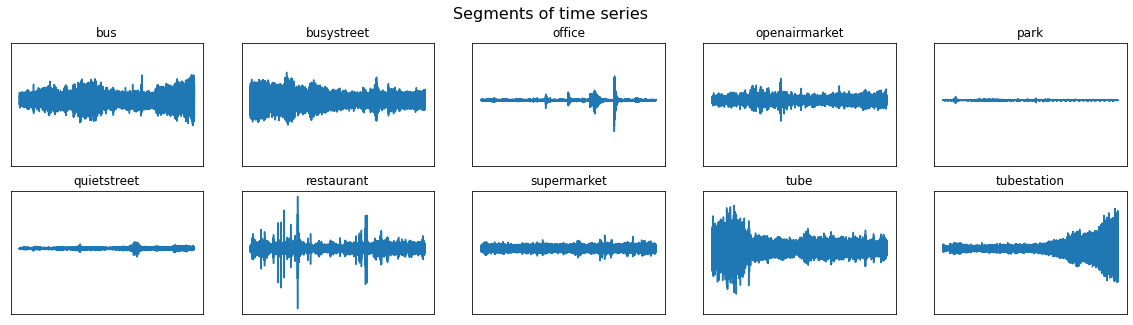

In [0]:
#plot only one for each class
#we can see the coherence . Length of each file has changed now...
segs={}
for c in classes:
  wav_file = dc13[dc13.Class == c].iloc[0,0]#one sample for each class_the first
  #signal , rate = librosa.load(audio_path+wav_file, sr=44100)
  #keys[c] = wav_file
  #print(wav_file)
  segs[c] = segments[wav_file]
plot_segments(segs)
plt.show()

In [0]:
#Save segmented audio
import pickle

def save_obj(obj, name ):
    with open('obj/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open('obj/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

filename = 'segs'
outfile = open(filename,'wb')
pickle.dump(segs,outfile)
outfile.close()

In [0]:
#Analysis of segmented audio {calculate length for the segmented audio} 
rate=44100
dc13.set_index('filename',inplace=True)
for f in dc13.index:
  
  duration = len(segments[f])/rate
  dc13.at[f, 'seglength']=duration

In [23]:
#Analysis of segmented audio {Class - Dist and Dev}

seg_class_dist = dc13.groupby(['Class'])['seglength'].mean()
print('Class_distribution for segmented audio\n\n',seg_class_dist)
seg_class_dev = dc13.groupby(['Class'])['seglength'].std()
print('\nClass_deviation for segmented audio\n\n',seg_class_dev)

Class_distribution for segmented audio

 Class
bus              30.000000
busystreet       30.000000
office           11.183982
openairmarket    30.000000
park             24.030118
quietstreet      27.876825
restaurant       30.000000
supermarket      29.834923
tube             29.999032
tubestation      30.000000
Name: seglength, dtype: float64

Class_deviation for segmented audio

 Class
bus               0.000000
busystreet        0.000000
office           11.232923
openairmarket     0.000000
park             12.393371
quietstreet       3.904938
restaurant        0.000000
supermarket       0.511150
tube              0.003062
tubestation       0.000000
Name: seglength, dtype: float64


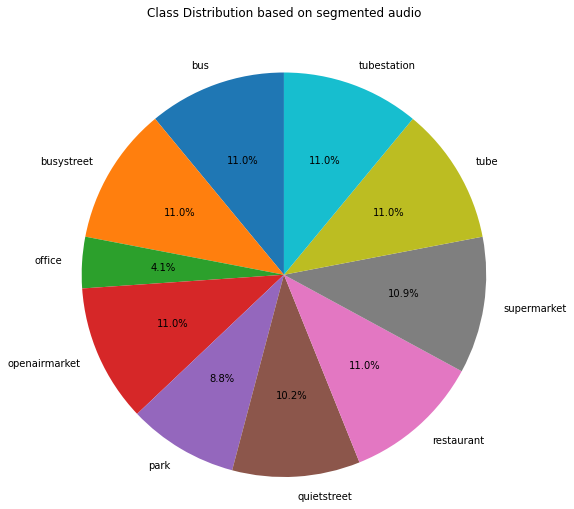

In [24]:
#Plot a pie for Class Dist 
#Here we notice that classes 'park' and 'office' are more sensible to silence or smthlikethat

fig ,ax = plt.subplots(figsize=(8,8))
ax.set_title('Class Distribution based on segmented audio', y=1.08)
ax.pie(seg_class_dist, labels=seg_class_dist.index, autopct='%1.1f%%', shadow=False, startangle=90 ,radius=37)
ax.axis('equal')#circle
plt.show()

In [27]:
fold_dist=dc13.groupby(['fold','Class'])['Class'].count()#1file of each class in each fold
print(fold_dist)

fold  Class        
1.0   bus              1
      busystreet       1
      office           1
      openairmarket    1
      park             1
                      ..
10.0  quietstreet      1
      restaurant       1
      supermarket      1
      tube             1
      tubestation      1
Name: Class, Length: 100, dtype: int64


In [53]:
folds=[]
fold = np.unique(dc13['fold'].astype(int))
for i in range(len(fold)):
  name=('fold'+str(fold[i]))
  folds.append(name)

print(folds)

['fold1', 'fold2', 'fold3', 'fold4', 'fold5', 'fold6', 'fold7', 'fold8', 'fold9', 'fold10']


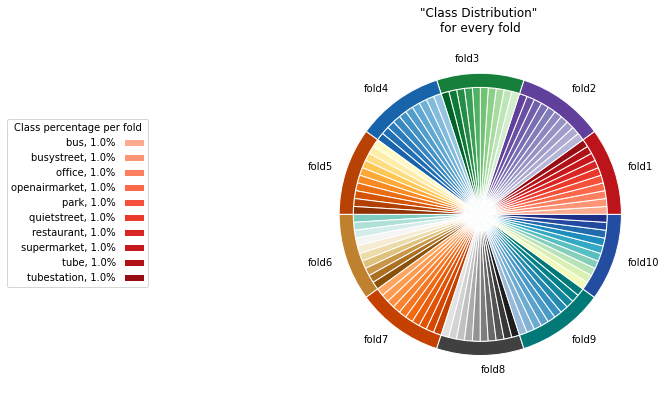

In [72]:
# Plot FOLD DISTRIBUTION

fpf=np.array((dc13.groupby(['fold'])['Class'].count()/len(dc13.index)*100).astype(int))
cpf=np.array((fold_dist/len(dc13.index))*100)#class percentage in each folder

fig ,ax = plt.subplots(figsize=(7,7))
fig.subplots_adjust(0.3,0,1,1,1)

size = 0.1#size of the outer
total = sum(fold_dist)

#one for each fold
cmap1 = plt.cm.Reds
cmap2 = plt.cm.Purples
cmap3 = plt.cm.Greens
cmap4 = plt.cm.Blues
cmap5 = plt.cm.YlOrBr
cmap6 = plt.cm.BrBG_r
cmap7 = plt.cm.Oranges
cmap8 = plt.cm.Greys
cmap9 = plt.cm.PuBuGn
cmap10 = plt.cm.YlGnBu

outer_colors = [cmap1(.8), cmap2(.8), cmap3(.8),cmap4(.8),cmap5(.8),
                cmap6(.8), cmap7(.8),cmap8(.8),cmap9(.8),cmap10(.8)]
inner_colors = [*cmap1(np.linspace(.3, .9, 10)),
                *cmap2(np.linspace(.4, .8, 10)),
                *cmap3(np.linspace(.2, .9, 10)),
                *cmap4(np.linspace(.4, .8, 10)),
                *cmap5(np.linspace(.1, .9, 10)),
                *cmap6(np.linspace(.3, .9, 10)),
                *cmap7(np.linspace(.4, .8, 10)),
                *cmap8(np.linspace(.2, .9, 10)),
                *cmap9(np.linspace(.4, .8, 10)),
                *cmap10(np.linspace(.1, .9, 10)),]

#folds =  list (np.unique(esc50.fold))
#folds = ['fold_1','fold_2','fold_3','fold_4','fold_5']

ax.pie(cpf, radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=1, edgecolor='w'))

ax.pie(fpf, radius=1, labels=folds, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='\"Class Distribution\" \nfor every fold')

plt.legend(
  loc='best',
  labels=['%s, %1.1f%%' % (
      l,(float(s) / total) * 100) for l, s in zip(classes, fold_dist)],
  bbox_to_anchor=(0.0, 0.7),
  bbox_transform=fig.transFigure,
  markerfirst=False,
  title='Class percentage per fold'
)

In [75]:
#New fold_dist based on segmented audio
fold_dist= dc13.groupby(['fold','Class'])['seglength'].mean()

print(fold_dist)

fold  Class        
1.0   bus              30.000000
      busystreet       30.000000
      office            5.201723
      openairmarket    30.000000
      park              0.739864
                         ...    
10.0  quietstreet      30.000000
      restaurant       30.000000
      supermarket      30.000000
      tube             30.000000
      tubestation      30.000000
Name: seglength, Length: 100, dtype: float64


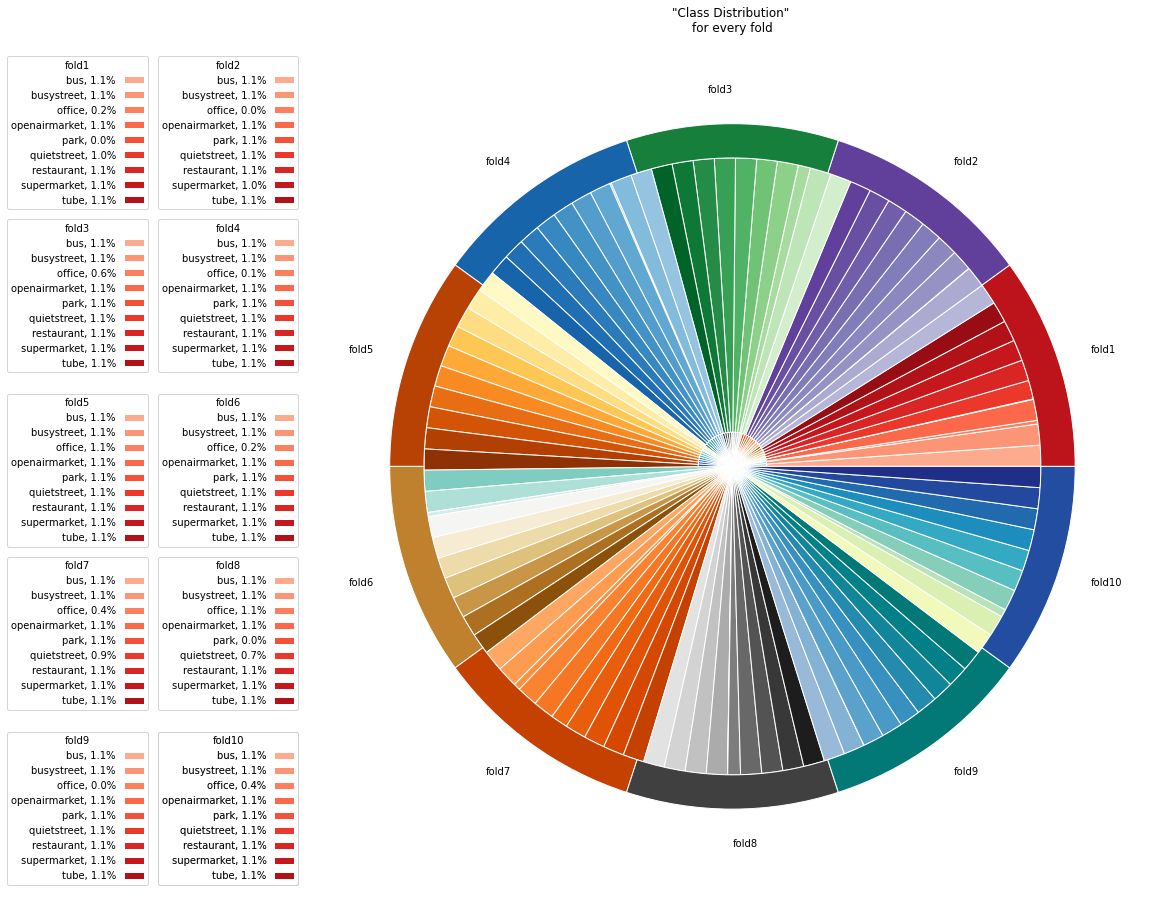

In [76]:
# Plot new FOLD DISTRIBUTION

#Percentage of files for each folder
fpf=np.array((dc13.groupby(['fold'])['Class'].count()/len(dc13.index)*100).astype(int)) 
cpf=np.array((fold_dist/len(dc13.index))*100)#class percentage in each folder

fig ,ax = plt.subplots(figsize=(7,7))
fig.subplots_adjust(0.3,-2, 2,1,1)#experimental values

size = 0.1#size of the outer
total = sum(fold_dist)

#one for each fold
cmap1 = plt.cm.Reds
cmap2 = plt.cm.Purples
cmap3 = plt.cm.Greens
cmap4 = plt.cm.Blues
cmap5 = plt.cm.YlOrBr
cmap6 = plt.cm.BrBG_r
cmap7 = plt.cm.Oranges
cmap8 = plt.cm.Greys
cmap9 = plt.cm.PuBuGn
cmap10 = plt.cm.YlGnBu

outer_colors = [cmap1(.8), cmap2(.8), cmap3(.8),cmap4(.8),cmap5(.8),
                cmap6(.8), cmap7(.8),cmap8(.8),cmap9(.8),cmap10(.8)]
inner_colors = [*cmap1(np.linspace(.3, .9, 10)),
                *cmap2(np.linspace(.4, .8, 10)),
                *cmap3(np.linspace(.2, .9, 10)),
                *cmap4(np.linspace(.4, .8, 10)),
                *cmap5(np.linspace(.1, .9, 10)),
                *cmap6(np.linspace(.3, .9, 10)),
                *cmap7(np.linspace(.4, .8, 10)),
                *cmap8(np.linspace(.2, .9, 10)),
                *cmap9(np.linspace(.4, .8, 10)),
                *cmap10(np.linspace(.1, .9, 10)),]

ax.pie(cpf, radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=1, edgecolor='w'))

ax.pie(fpf, radius=1, labels=folds, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='\"Class Distribution\" \nfor every fold')

params= ['lower right','lower left','upper right','upper left']
u=-0.67
bbox=[0,0,0,0,u,u,u,u,2*u,2*u]
for i in range(len(folds)):
  f=i+1
  floor=(f-1)*10 #0-10-20-30-40-50-60-70-80-90
  ceiling=(f*10)-1 #9-19-29-39-49-59-69-79-89-99

  leg=ax.legend(
    loc=params[i%4],
    labels=['%s, %1.1f%%' % (
    l,(float(s) / total) * 100) for l, s in zip(classes, fold_dist[floor:ceiling])],
    bbox_to_anchor=(0.0, bbox[i]),
    bbox_transform=fig.transFigure,
    markerfirst=False,
    title=folds[f-1]#title='Class percentage per fold'
  )
  ax.add_artist(leg);

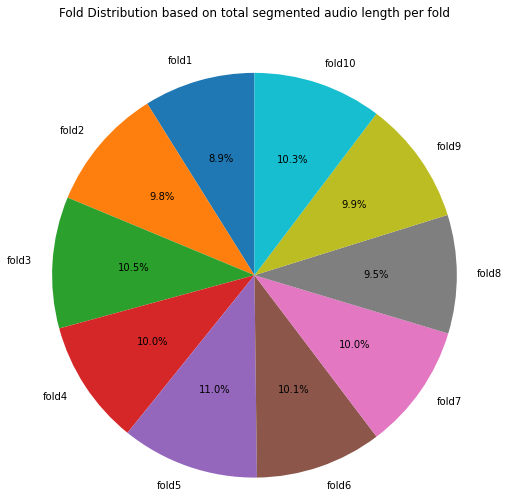

In [80]:
#New fold_dist based on total segmented audio length per fold 
#Plot fold_dist

fold_distr= dc13.groupby(['fold'])['seglength'].mean()

fig ,ax = plt.subplots(figsize=(8,8))
ax.set_title('Fold Distribution based on total segmented audio length per fold', y=1.08)
ax.pie(fold_distr, labels=folds, autopct='%1.1f%%', shadow=False, startangle=90 ,radius=37)
ax.axis('equal')#circle
plt.show()